

## AIR QUALITY INDEX PREDICTION



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8
from pandas import datetime

In [2]:
import seaborn as sns

In [3]:
data = pd.read_excel('GG.xlsx')
data.head(50)

,From Date,PM2.5
0,09-06-2019 00:00,100.92
1,09-06-2019 01:00,106.04
2,09-06-2019 02:00,115.41
3,09-06-2019 03:00,120.62
4,09-06-2019 04:00,124.95
5,09-06-2019 05:00,123.51
6,09-06-2019 06:00,117.67
7,09-06-2019 07:00,108.58
8,09-06-2019 08:00,135.89
9,09-06-2019 09:00,175.34


In [4]:
data.columns = ['Date','Pollutant']
data.head()

,Date,Pollutant
0,09-06-2019 00:00,100.92
1,09-06-2019 01:00,106.04
2,09-06-2019 02:00,115.41
3,09-06-2019 03:00,120.62
4,09-06-2019 04:00,124.95


In [5]:
data.dtypes

Date         object
Pollutant    object
dtype: object

In [6]:
data['Pollutant'].unique()

array([100.92, 106.04, 115.41, ..., 42.42, 43.17, 39.65], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 2 columns):
Date         8785 non-null object
Pollutant    8785 non-null object
dtypes: object(2)
memory usage: 137.4+ KB


In [8]:
data_1 = data.replace(to_replace ="None",value = np.nan) #In this dataset, null values are represented as none

In [9]:
data_1.isnull().sum()

Date           0
Pollutant    651
dtype: int64

In [10]:
# Here we used Forward Fill method to fill the null values as it is very obivious for AQI of current hour will 
# be almost same as last hour
df = data_1.fillna(method="ffill")

In [11]:
df['Date'] = pd.to_datetime(df['Date'],format = '%d-%m-%Y %H:%M')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 2 columns):
Date         8785 non-null datetime64[ns]
Pollutant    8785 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.4 KB


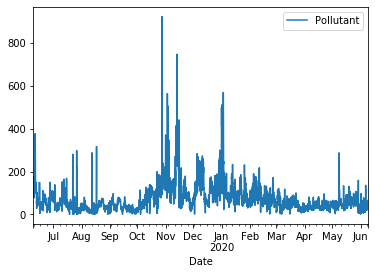

In [13]:
df.plot.line(x = 'Date', y = 'Pollutant')
plt.show()

In [14]:
df.set_index(df['Date'],inplace=True)

In [15]:
df2 = df.drop(columns='Date')

In [16]:
df2.head()

,Pollutant
Date,
2019-06-09 00:00:00,100.92
2019-06-09 01:00:00,106.04
2019-06-09 02:00:00,115.41
2019-06-09 03:00:00,120.62
2019-06-09 04:00:00,124.95


In [17]:
df2.shape

(8785, 1)

In [18]:
# Here we splitted data as 60% train and  40% test
train=df2[0:5271] 
test=df2[5271:]

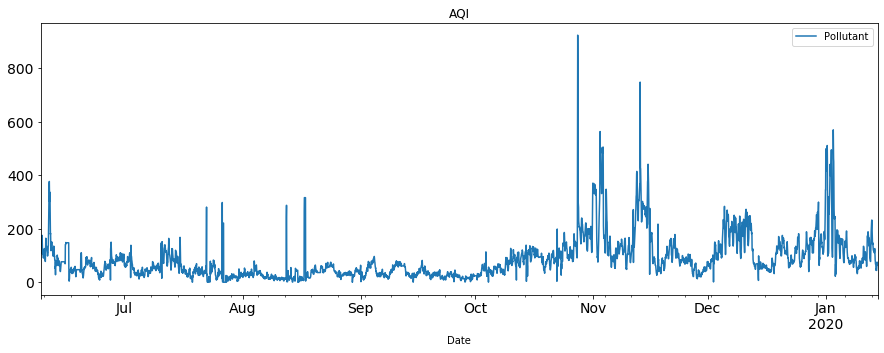

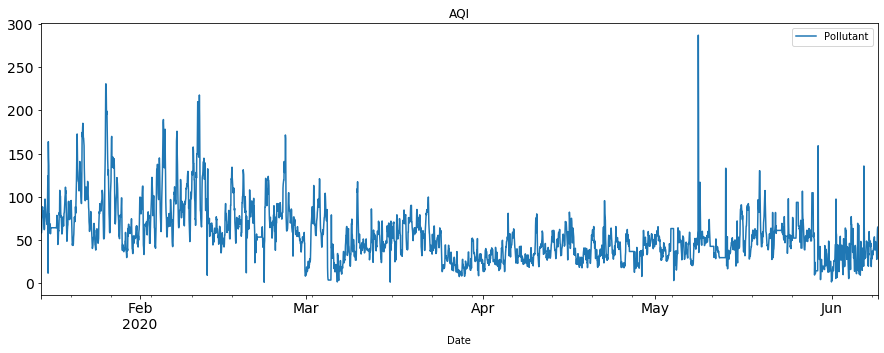

In [19]:
train.plot(figsize=(15,5), title= 'AQI', fontsize=14)
test.plot(figsize=(15,5), title= 'AQI', fontsize=14)
plt.show()

As we can see in the dataset that on November 2019, December 2019 and January 2020 being the festival season there is a steep rise of the pollutant PM2.5(as recorded in dataset).
There is no trend in the dataset.
There is a seasonality present.

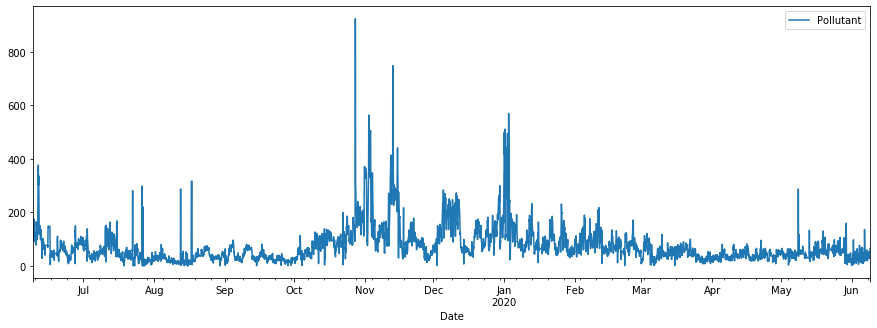

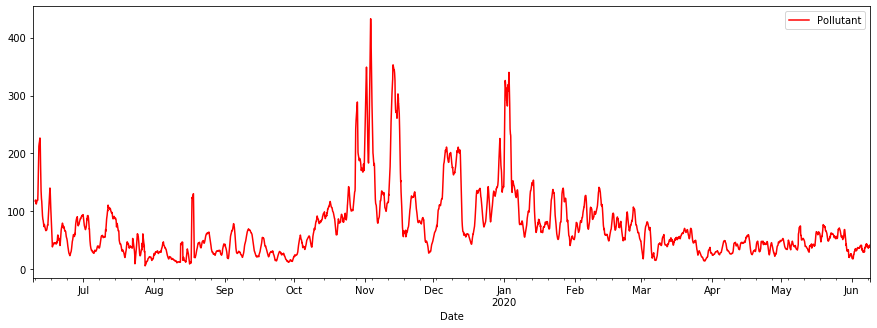

In [20]:
moving_avg =df2.rolling(24).mean()
df2.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

In [21]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(df2,model='additive', freq=24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

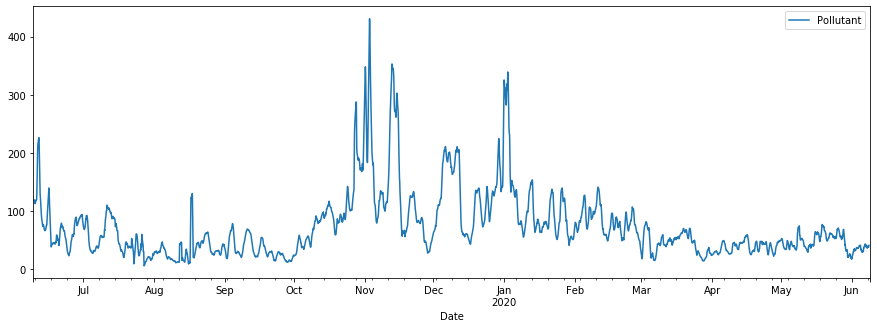

In [22]:
trend.plot(kind="line",figsize=(15,5))
plt.show()

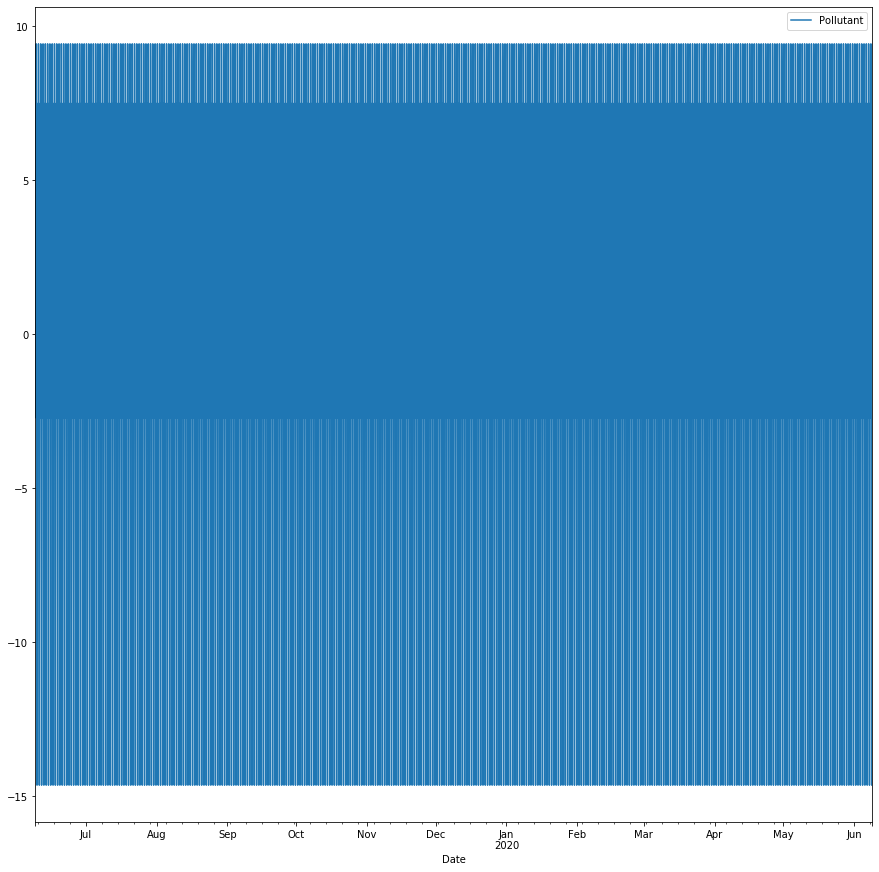

In [23]:
seasonal.plot(kind="line",figsize=(15,15))
plt.show()

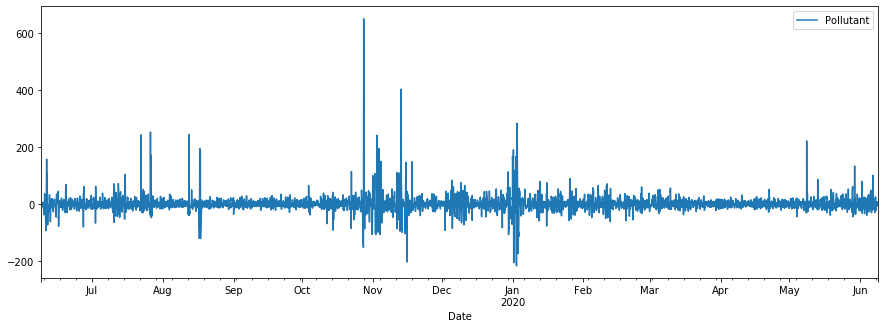

In [24]:
residual.plot(kind="line",figsize=(15,5))
plt.show()

In [25]:
decomposition = sts.seasonal_decompose(df2,model='multiplicative', freq=24)

trend_m = decomposition.trend
seasonal_m = decomposition.seasonal
residual_m = decomposition.resid

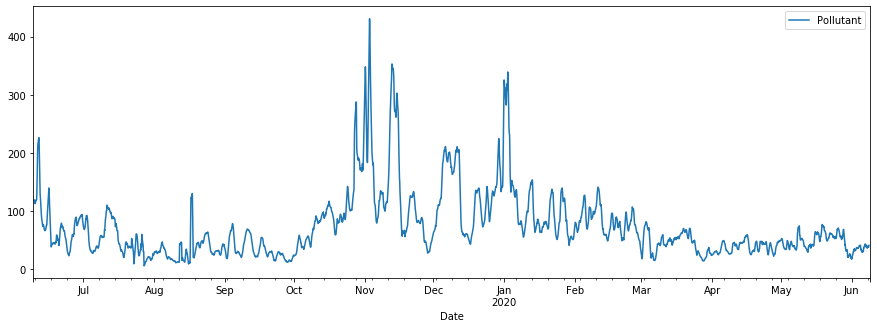

In [26]:
trend_m.plot(kind="line",figsize=(15,5))
plt.show()

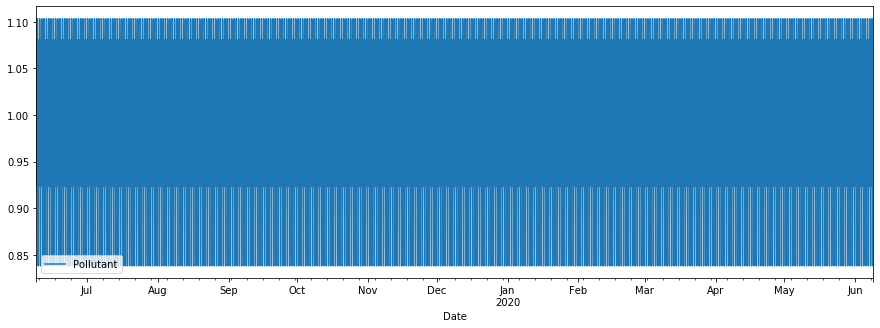

In [27]:
seasonal_m.plot(kind="line",figsize=(15,5))
plt.show()

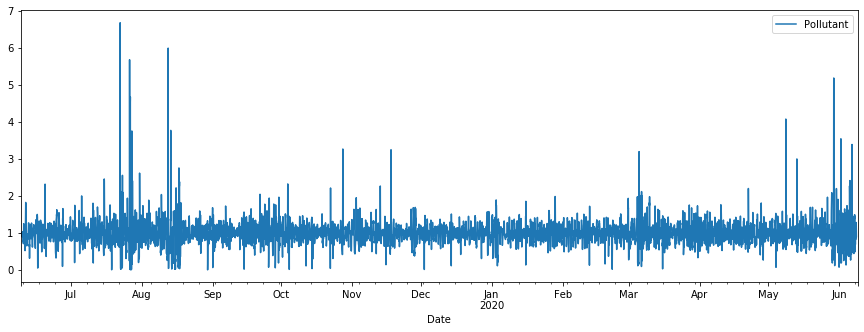

In [28]:
residual_m.plot(kind="line",figsize=(15,5))
plt.show()

In [29]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [30]:
train = train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(3514)
ses.summary()

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,5271
Model:,SimpleExpSmoothing,SSE,2643405.794
Optimized:,True,AIC,32776.987
Trend:,None,BIC,32790.127
Seasonal:,None,AICC,32776.995
Seasonal Periods:,None,Date:,"Sun, 14 Jun 2020"
Box-Cox:,False,Time:,15:24:13
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,100.92000,l.0,True


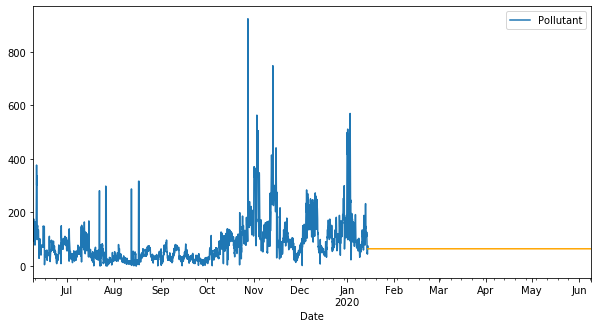

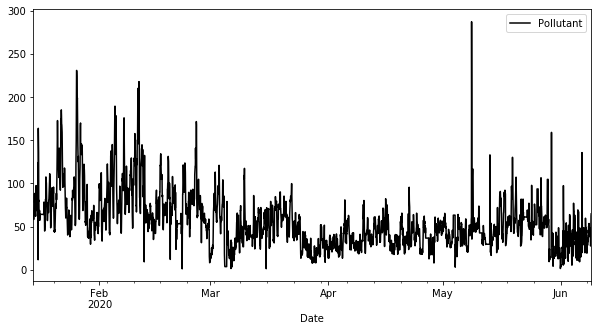

In [31]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

In [32]:
hwes = ExponentialSmoothing(train , seasonal_periods=24 ,trend='add').fit()
hwes.summary()

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,5271
Model:,ExponentialSmoothing,SSE,2643405.794
Optimized:,True,AIC,32780.987
Trend:,Additive,BIC,32807.267
Seasonal:,None,AICC,32781.003
Seasonal Periods:,None,Date:,"Sun, 14 Jun 2020"
Box-Cox:,False,Time:,15:24:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_slope,0.000000,beta,True


In [33]:
hwes1 = hwes.forecast(3514)

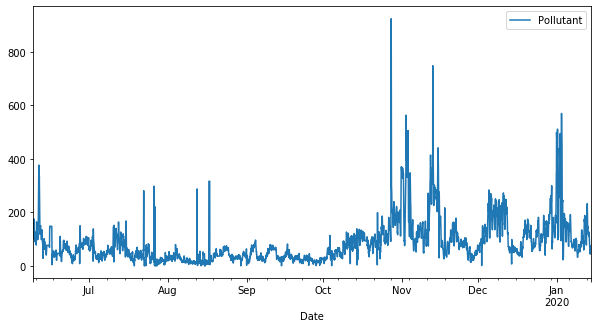

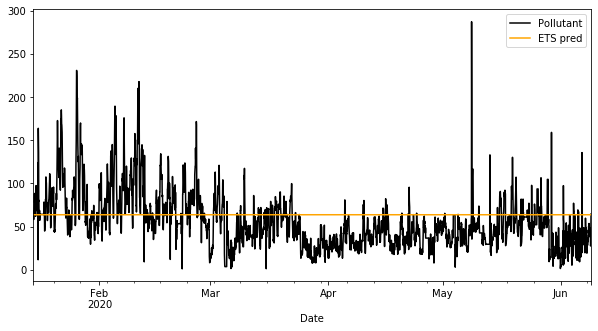

In [34]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

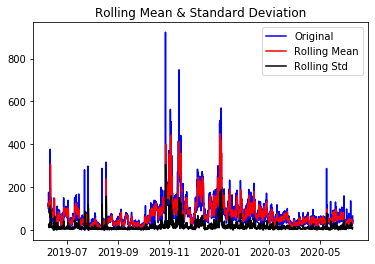

Results of Dickey-Fuller Test:
Test Statistic                -5.795855e+00
p-value                        4.754013e-07
#Lags Used                     3.400000e+01
Number of Observations Used    8.750000e+03
Critical Value (1%)           -3.431098e+00
Critical Value (5%)           -2.861870e+00
Critical Value (10%)          -2.566946e+00
dtype: float64


In [36]:
test_stationarity(df2['Pollutant'])

As we can see that p value is way much less than 0.05, the data is stationary

In [37]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

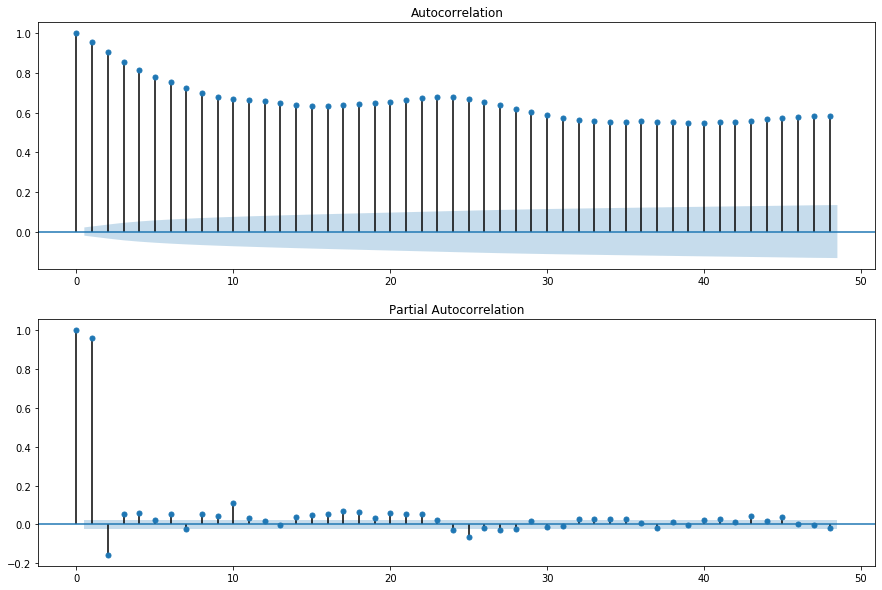

In [38]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(df2, ax=pyplot.gca(),lags=48)
pyplot.subplot(212)
plot_pacf(df2, ax=pyplot.gca(),lags=48)
pyplot.show()

In [39]:
import itertools
p=d=q=range(0,5) 
pdq=list(itertools.product(p,d,q))

In [40]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
for para in pdq:
    try:
        model_arima=ARIMA(train,order=para)
        model_arima_fit=model_arima.fit()
        print(para,model_arima_fit.aic)
    except:
        continue
# now to see which combination is giving minimum value

(0, 0, 0) 60944.26681318221
(0, 0, 1) 55444.41291530096
(0, 1, 0) 47727.38112551433
(0, 1, 1) 47583.54853697475
(0, 1, 2) 47582.36043702328
(0, 1, 3) 47533.18720780595
(0, 1, 4) 47517.022006204206
(0, 2, 0) 50474.44540149175
(0, 2, 1) 47729.897780151405
(0, 2, 2) 47585.77692064619
(1, 0, 0) 47631.379292532816
(1, 0, 1) 47449.908643489245
(1, 0, 2) 47451.56767182442
(1, 0, 3) 47431.50964840491
(1, 0, 4) 47430.115747081
(1, 1, 0) 47598.647275560565
(1, 1, 1) 47584.098976009074
(1, 1, 2) 47335.2284041197
(1, 1, 3) 47317.96436769024
(1, 1, 4) 47319.76945089309
(1, 2, 0) 49676.510576132205
(2, 0, 0) 47458.594549091504
(2, 0, 1) 47451.713752088865
(2, 0, 2) 47335.53722485079
(2, 0, 3) 47317.23636488632
(2, 0, 4) 47319.13480496702
(2, 1, 0) 47566.6282894122
(2, 1, 1) 47317.227114613284
(2, 1, 2) 47319.161866815426
(2, 1, 3) 47300.25499046313
(2, 1, 4) 47300.4139691226
(2, 2, 0) 49263.29323767629
(3, 0, 0) 47445.66919423253
(3, 0, 1) 47316.27520108818
(3, 0, 2) 47318.11819323062
(3, 0, 3) 4730

In [41]:
#Since the data is already stationary so we checked for the most optimised parameters with differece value of 0
model = ARIMA(train, order=(4,0,4))
model_fit=model.fit(disp=True)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:              Pollutant   No. Observations:                 5271
Model:                     ARMA(4, 4)   Log Likelihood              -23631.850
Method:                       css-mle   S.D. of innovations             21.416
Date:                Sun, 14 Jun 2020   AIC                          47283.701
Time:                        15:28:27   BIC                          47349.400
Sample:                    06-09-2019   HQIC                         47306.666
                         - 01-14-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              83.2749     14.236      5.850      0.000      55.373     111.177
ar.L1.Pollutant     1.8171      0.040     45.217      0.000       1.738       1.896
ar.L2.Pollutant    -0.0316      

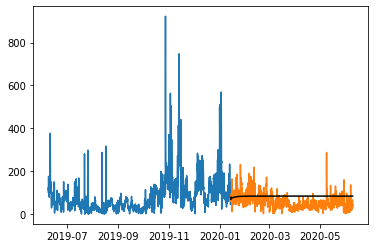

In [42]:
forecast = model_fit.forecast(steps=3514)[0]

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [43]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

36.35174472831643


In [44]:
import statsmodels.api as sm

In [45]:
#model = sm.tsa.SARIMAX(train, order=(4,0,4), seasonal_order=(1,1,1,24))
model = sm.tsa.SARIMAX(train, order=(4,0,4), max_P = 4, max_D = 4, max_Q = 4)

In [46]:
model_fit=model.fit(disp=True)
print(model_fit.summary())

                           Statespace Model Results                           
Dep. Variable:              Pollutant   No. Observations:                 5271
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -23728.080
Date:                Sun, 14 Jun 2020   AIC                          47474.161
Time:                        15:28:47   BIC                          47533.291
Sample:                    06-09-2019   HQIC                         47494.830
                         - 01-14-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0757      0.054     19.754      0.000       0.969       1.182
ar.L2         -0.1120      0.082     -1.374      0.170      -0.272       0.048
ar.L3         -0.7634      0.064    -11.979      0.0

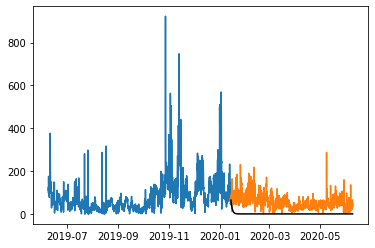

In [47]:
forecast = model_fit.forecast(steps=3514)
#print(forecast)

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [48]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

55.09003755349244


In [49]:
df2.tail()

,Pollutant
Date,
2020-06-08 20:00:00,27.62
2020-06-08 21:00:00,29.88
2020-06-08 22:00:00,51.40
2020-06-08 23:00:00,62.38
2020-06-09 00:00:00,64.85


In [50]:
yhat1 = model_fit.predict(start='2020-06-09 01:00:00', end='2020-06-30 23:00:00')

In [51]:
pred_final = pd.DataFrame(yhat1)
pred_final.columns = ['Pred_Pollutant']
pred_final.head()

,Pred_Pollutant
2020-06-09 01:00:00,1.423283e-39
2020-06-09 02:00:00,1.385873e-39
2020-06-09 03:00:00,1.349446e-39
2020-06-09 04:00:00,1.313977e-39
2020-06-09 05:00:00,1.279440e-39


In [52]:
#pred_final.to_csv('Predicted_Air_Quality.csv')

##### For future predicted values with SARIMAX model please refer the attached csv with name Predicted_Air_Quality.csv